# Yandex Weather Analysis

Content:
- [Data Exploration and Manupulating](#data-exploration-and-manupulating)
- [Basic statistics](#basic-statistics)
- [Visualization](#visualization)
- [Report](#report)

## Data Exploration and Manupulating

In [91]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as s

In [92]:
df = pl.read_csv('parse.csv')

In [93]:
df

date,day_of_week,day_temperature,night_temperature,weather,feels_like,pressure,humidity,wind,wind_direction,day_climatic_temperature,night_climatic_temperature
str,str,i64,i64,str,i64,i64,i64,f64,str,i64,i64
"""1 January 2024…","""понедельник""",-1,-4,"""облачно с проя…",-6,641,55,5.3,"""Ю""",null,null
"""2 January 2024…","""вторник""",0,-2,"""ясно""",-6,639,50,5.5,"""Ю""",null,null
"""3 January 2024…","""среда""",0,-3,"""снег""",-5,638,61,5.5,"""ЮЗ""",null,null
"""4 January 2024…","""четверг""",1,-2,"""малооблачно""",-7,695,74,2.6,"""С""",-3,-5
"""5 January 2024…","""пятница""",6,-1,"""облачно с проя…",-1,695,66,2.3,"""СВ""",-4,-6
"""6 January 2024…","""суббота""",7,1,"""облачно с проя…",-1,696,69,2.4,"""ЮЗ""",-3,-5
"""7 January 2024…","""воскресенье""",5,1,"""облачно с проя…",-2,695,70,2.2,"""В""",-2,-4
"""8 January 2024…","""понедельник""",6,1,"""пасмурно""",1,697,78,1.7,"""В""",-3,-5
"""9 January 2024…","""вторник""",7,2,"""пасмурно""",0,696,76,1.6,"""В""",-1,-4


In [94]:
df = df.with_columns(pl.col("date").str.to_datetime("%d %B %Y"))

In [95]:
coldest_day = df.filter(df['day_temperature'] == df['day_temperature'].min())
hottest_day = df.filter(df['day_temperature'] == df['day_temperature'].max())
average_data = df[['day_temperature', 'night_temperature', 'feels_like']].mean()

## Basic Statistics

In [96]:
average_data = df[['day_temperature', 'night_temperature', 'feels_like', 'wind', 'humidity']].mean()
average_weather = df['weather'].value_counts().sort('count').reverse().head()

print("Average Weather Parameters:")
print(average_data)

print("\nMost Common Weather:")
print(average_weather)

print("\nColdest Day:")
print(coldest_day)

print("\nHottest Day:")
print(hottest_day)

Average Weather Parameters:
shape: (1, 5)
┌─────────────────┬───────────────────┬────────────┬─────────┬───────────┐
│ day_temperature ┆ night_temperature ┆ feels_like ┆ wind    ┆ humidity  │
│ ---             ┆ ---               ┆ ---        ┆ ---     ┆ ---       │
│ f64             ┆ f64               ┆ f64        ┆ f64     ┆ f64       │
╞═════════════════╪═══════════════════╪════════════╪═════════╪═══════════╡
│ -0.939394       ┆ -4.727273         ┆ -8.666667  ┆ 4.20303 ┆ 69.969697 │
└─────────────────┴───────────────────┴────────────┴─────────┴───────────┘

Most Common Weather:
shape: (5, 2)
┌────────────────────────┬───────┐
│ weather                ┆ count │
│ ---                    ┆ ---   │
│ str                    ┆ u32   │
╞════════════════════════╪═══════╡
│ пасмурно               ┆ 9     │
│ малооблачно            ┆ 6     │
│ небольшой снег         ┆ 6     │
│ облачно с прояснениями ┆ 6     │
│ ясно                   ┆ 4     │
└────────────────────────┴───────┘

Coldest Day

## Visualization

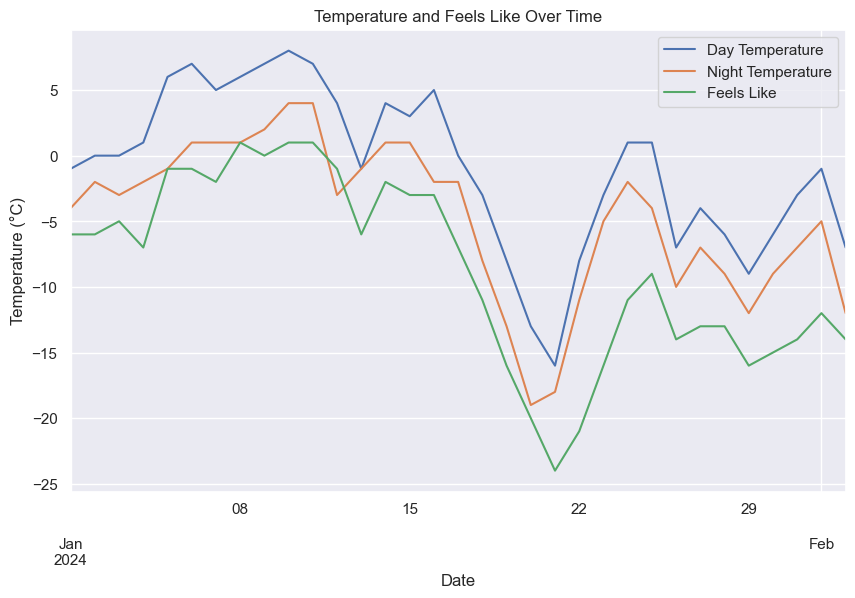

In [97]:
df_pandas = df.to_pandas()
fig, ax1 = plt.subplots(figsize=(10, 6))

df_pandas.plot(x='date', y=['day_temperature', 'night_temperature', 'feels_like'], ax=ax1, title='Temperature and Feels Like Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend(['Day Temperature', 'Night Temperature', 'Feels Like'])
plt.show()

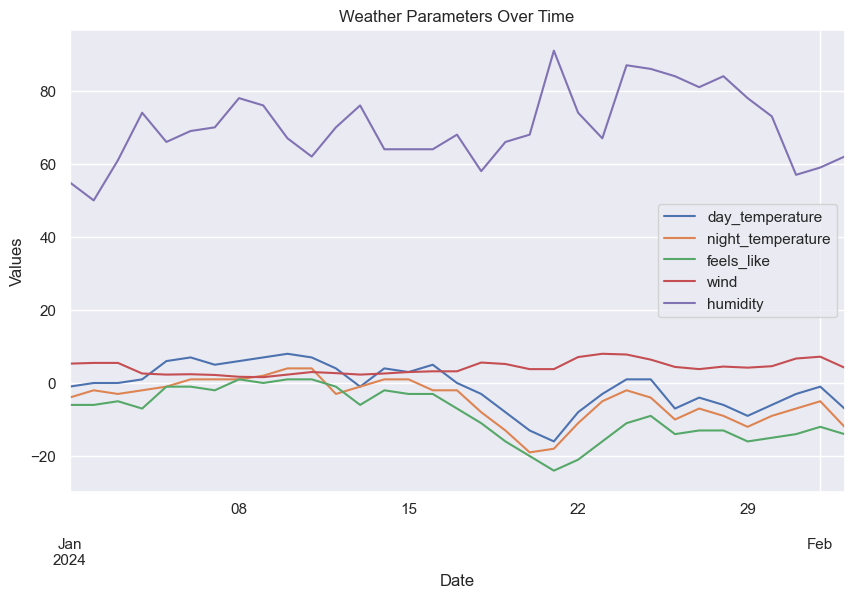

In [98]:
# Visualization using hvplot
df_pandas = df.to_pandas()

fig, ax = plt.subplots(figsize=(10, 6))
df_pandas.plot(x='date', y=['day_temperature', 'night_temperature', 'feels_like', 'wind', 'humidity'], ax=ax, title='Weather Parameters Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

## Report

#### Описание каждого столбца в датасете

1. date:
 - Представляет дату в формате 'ГГГГ-ММ-ДД'.
 - Тип: Дата и время с временной единицей 'us' (микросекунды) (Datetime).
   
2. day_of_week:
 - Представляет день недели, соответствующий дате.
 - Тип: Строка (String).
   
3. day_temperature:
 - Представляет температуру днем.
 - Тип: Целое число (Int64).
 - Измерение: °C
   
4. night_temperature:
 - Представляет температуру ночью.
 - Тип: Целое число (Int64).
 - Измерение: °C
   
5. weather:
 - Описывает погодные условия, такие как 'Облачно', 'Ясно', 'Дождь' и так далее.
 - Тип: Строка (String).

6. feels_like:
 - Представляет ощущаемую температуру, учитывая факторы, такие как ветер и влажность.
 - Тип: Целое число (Int64).
 - Измерение: °C

7. pressure:
 - Представляет атмосферное давление.
 - Тип: Целое число (Int64).
 - Измерение: мм.рт.ст

8. humidity:
 - Представляет уровень влажности в воздухе.
 - Тип: Целое число (Int64).
 - Измерение: %

9. wind:
 - Представляет скорость ветра.
 - Тип: Число с плавающей точкой (Float64).
 - Измерение: м/с

10. wind_direction:
 - Представляет направление ветра, такое как 'С' (Север), 'СВ' (Северо-восток) и так далее.
 - Тип: Строка (String).

11. day_climatic_temperature:
 - Представляет климатическую температуру днем.
 - Тип: Целое число (Int64).
 - Измерение: °C

12. night_climatic_temperature:
 - Представляет климатическую температуру ночью.
 - Тип: Целое число (Int64).
 - Измерение: °C

#### Я выбрал эти параметры чтобы выявить среднюю погоду, наиболее холодный и жаркий день.

1. day_temperature и night_temperature:
- Они предоставляют информацию о температуре в разное время суток, что важно для понимания общего климата.

2. wind:
- Скорость ветра может существенно влиять на ощущения температуры, особенно в холодное время года.

3. humidity:
- Влажность воздуха также может влиять на восприятие температуры и уровень комфорта.


4. **`feels_like`**: 
- Этот параметр учитывает факторы, такие как ветер и влажность, и предоставляет более точное представление о том, как люди ощущают температуру.


Проста для анализа:
   - После анализа (2 график) средних значений можно выделить, что ветер и влажность оказывают влияние на температуру по ощущениям (feels_like).
   - Исследование средних значений данных параметров позволяет определить, какие условия ветра и влажности обычно сопровождаются наиболее комфортной или некомфортной температурой.


### Выводы

1. Средная Погода
- Среднее значение температуры днем и ночью находится в негативной зоне, указывая на холодный период.
- Ощущаемая температура значительно ниже, что может быть обусловлено влиянием ветра и влажности.
- Средняя скорость ветра составляет 4.29 м/с, что также может усилить ощущение холода.
- Влажность находится на уровне 70.15%, что может влиять на восприятие температуры.
- Наиболее часто встречающимся видом погоды является `Облачно с прояснениями`, присутствующий в течение `9 дней`.
- `Общий анализ указывает на холодный период с влиянием ветра и влажности, что согласуется с негативными значениями ощущаемой температуры.`.

2. Наиболее холодный и жаркий день:
- На основе анализа данных видно, что наиболее холодный день приходится на 21.01.2024 года.
- Самый жаркий день 10.01.2024 года. 